In [1]:
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


In [5]:
#Vemos las primeras filas del dataframe
data.head()

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3


In [6]:
#Observamos la informacion general del dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             300 non-null    int64 
 1   app_version         300 non-null    object
 2   platform            300 non-null    object
 3   session_duration    300 non-null    int32 
 4   number_of_sessions  300 non-null    int32 
 5   country             300 non-null    object
 6   user_feedback       300 non-null    int32 
dtypes: int32(3), int64(1), object(3)
memory usage: 13.0+ KB


In [7]:
#Observamos las caracteristicas
data.describe()

,user_id,session_duration,number_of_sessions,user_feedback
count,300.000000,300.000000,300.000000,300.000000
mean,150.500000,95.840000,9.596667,2.926667
std,86.746758,51.922773,5.672853,1.449699
min,1.000000,1.000000,1.000000,1.000000
25%,75.750000,51.250000,5.000000,2.000000
50%,150.500000,100.500000,9.000000,3.000000
75%,225.250000,141.250000,15.000000,4.000000
max,300.000000,179.000000,19.000000,5.000000


In [8]:
# Identificar duplicados
duplicados = data.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
data.head()

Número de registros duplicados: 0


,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3


In [9]:
# Identificar valores faltantes
data.isna().sum()

user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64

In [10]:
# Verificacion de tipo de datos
data.dtypes

user_id                int64
app_version           object
platform              object
session_duration       int32
number_of_sessions     int32
country               object
user_feedback          int32
dtype: object

In [11]:
columnas_categoricas = ['user_id', 'app_version', 'platform', 'session_duration', 'number_of_sessions', 'country', 'user_feedback']
for columna in columnas_categoricas:
    print(f"Valores únicos en '{columna}':")
    print(data[columna].unique())
    print("\n")

Valores únicos en 'user_id':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 2

In [13]:

# Cálculo de estadísticas descriptivas
summary_stats = data['session_duration'].describe()
# Determinación de valores atípicos usando el rango intercuartílico (IQR)
Q1 = summary_stats['25%']
Q3 = summary_stats['75%']
IQR = Q3 - Q1
# Límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de valores atípicos
outliers = data[(data['session_duration'] < lower_bound) | (data['session_duration'] > upper_bound)]

# Resultados
print("Estadísticas descriptivas:")
print(summary_stats)
print(f"\nLímite inferior: {lower_bound}")
print(f"Límite superior: {upper_bound}")
print("\nValores atípicos encontrados:")
print(outliers)

Estadísticas descriptivas:
count    300.000000
mean      95.840000
std       51.922773
min        1.000000
25%       51.250000
50%      100.500000
75%      141.250000
max      179.000000
Name: session_duration, dtype: float64

Límite inferior: -83.75
Límite superior: 276.25

Valores atípicos encontrados:
Empty DataFrame
Columns: [user_id, app_version, platform, session_duration, number_of_sessions, country, user_feedback]
Index: []


No se verifican posibles outliers en la columna

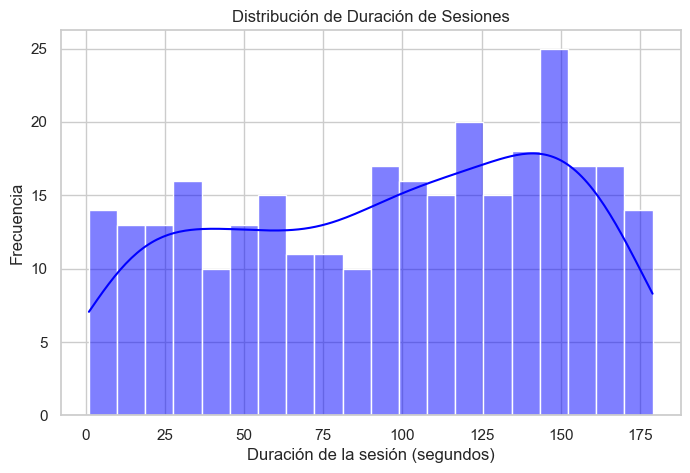

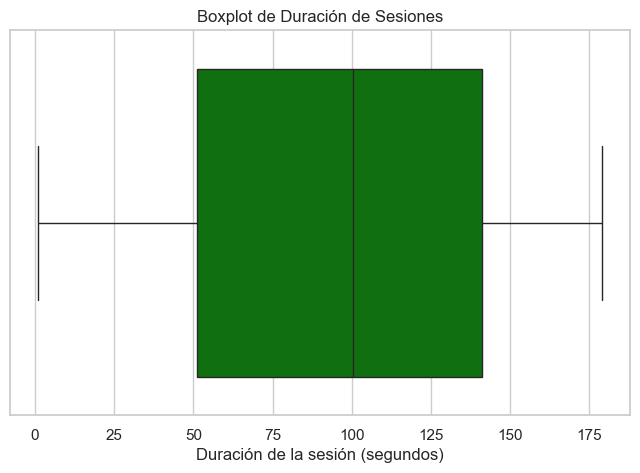

C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_6532\1245701290.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['country'], order=data['country'].value_counts().index, palette="viridis")


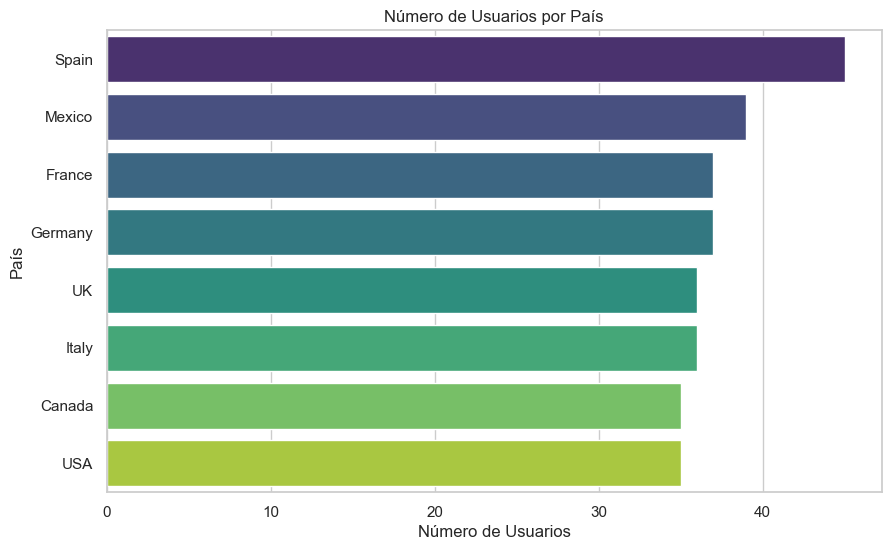

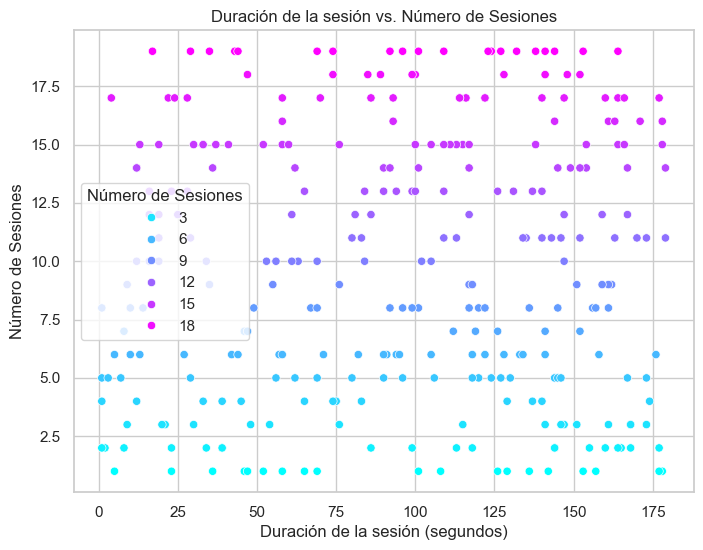

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Visualización univariante: Histograma de session_duration
plt.figure(figsize=(8, 5))
sns.histplot(data['session_duration'], bins=20, kde=True, color="blue")
plt.title("Distribución de Duración de Sesiones")
plt.xlabel("Duración de la sesión (segundos)")
plt.ylabel("Frecuencia")
plt.show()

# Interpretación: 
# La mayoría de las sesiones tienen una duración entre 50 y 150 segundos. 
# Hay un pequeño pico cerca de sesiones más largas (~160-170 segundos).

# 2. Visualización univariante: Boxplot de session_duration
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['session_duration'], color="green")
plt.title("Boxplot de Duración de Sesiones")
plt.xlabel("Duración de la sesión (segundos)")
plt.show()

# Interpretación: 
# El boxplot confirma la ausencia de valores atípicos y muestra que la mediana está cercana a 95 segundos.

# 3. Visualización multivariante: Gráfico de barras para sesiones por país
plt.figure(figsize=(10, 6))

sns.countplot(y=data['country'], order=data['country'].value_counts().index, palette="viridis")
plt.title("Número de Usuarios por País")
plt.xlabel("Número de Usuarios")
plt.ylabel("País")
plt.show()

# Interpretación:
# Podemos observar qué países tienen más usuarios. Esto podría ayudar a enfocar estrategias en las regiones más activas.

# 4. Visualización multivariante: Gráfico de dispersión de duración vs. número de sesiones
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['session_duration'], y=data['number_of_sessions'], hue=data['number_of_sessions'], palette="cool")
plt.title("Duración de la sesión vs. Número de Sesiones")
plt.xlabel("Duración de la sesión (segundos)")
plt.ylabel("Número de Sesiones")
plt.legend(title="Número de Sesiones")
plt.show()

# Interpretación:
# El gráfico muestra si hay una correlación entre la duración de las sesiones y la cantidad de sesiones que realiza un usuario.